This Jupyter Notebook contains code cells that run the simulation and visualize the results in different ways. It uses the Model class from the `model.py` file to do so.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from model import Model

## Replicating Paper Results

I tried to replicate some of the results from the paper, specifically looking at Figures 4 and 5 in Butler 97, which looked at the captured percentages and their starting latitudes. 

#### Moon simulation
The next code block handles setting up the simulation under the correct conditions for the Moon. It's currently set to 10000 molecules with 100 trials. The paper does do more trials and molecules but my laptop doesn't have the computational power to do that so I created a smaller sample size of numbers.

In [17]:
# Number of times to run the simulation
num_simulations = 1000

# Setting up empty stats to collect
total_captured_percentage_moon = 0 # Store the total captured percentage to calculate the average
captured_percentages_moon = []  # Store the captured percentages to see distribution

# Constants for the Moon and H2O. This isn't strictly necessary because this is what the model
# defaults are set to but I wanted to demonstrate how someone would go about setting them.
MASS = 2.988e-26
GRAVITY_MOON = 1.623
RADIUS_MOON = 1738e3

# Running simulation 1000 times
for _ in range(num_simulations):
    # Create a new instance of the model with 10000 initial molecules
    model = Model(10000, RADIUS_MOON, MASS, GRAVITY_MOON)
    # Run simulation until all molecules are trapped or captured
    model.run_simulation()    
    # Calculate percent captured
    captured_percent = (model.trapped / model.num_molecules) * 100    
    # Add percentage to array for later calculations
    captured_percentages_moon.append(captured_percent)
    total_captured_percentage_moon += captured_percent
    # Return the latitudes of captured molecules
    captured_start_latitudes_moon = model.captured_start_latitudes  # Get captured starting latitudes

# Calculate average captured percentage after all simulations are run
average_captured_percentage = total_captured_percentage_moon / num_simulations
print(f"Average Percent captured: {average_captured_percentage}%")

Captured: 3558, Lost: 6442, Total iterations: 140
Percent captured: 35.58%
Captured: 3572, Lost: 6428, Total iterations: 145
Percent captured: 35.72%
Captured: 3608, Lost: 6392, Total iterations: 178
Percent captured: 36.08%
Captured: 3501, Lost: 6499, Total iterations: 147
Percent captured: 35.010000000000005%
Captured: 3637, Lost: 6363, Total iterations: 138
Percent captured: 36.370000000000005%
Captured: 3502, Lost: 6498, Total iterations: 155
Percent captured: 35.02%
Captured: 3542, Lost: 6458, Total iterations: 133
Percent captured: 35.42%
Captured: 3564, Lost: 6436, Total iterations: 142
Percent captured: 35.64%
Captured: 3723, Lost: 6277, Total iterations: 133
Percent captured: 37.230000000000004%
Captured: 3575, Lost: 6425, Total iterations: 207
Percent captured: 35.75%
Captured: 3607, Lost: 6393, Total iterations: 162
Percent captured: 36.07%
Captured: 3616, Lost: 6384, Total iterations: 134
Percent captured: 36.16%
Captured: 3639, Lost: 6361, Total iterations: 137
Percent cap

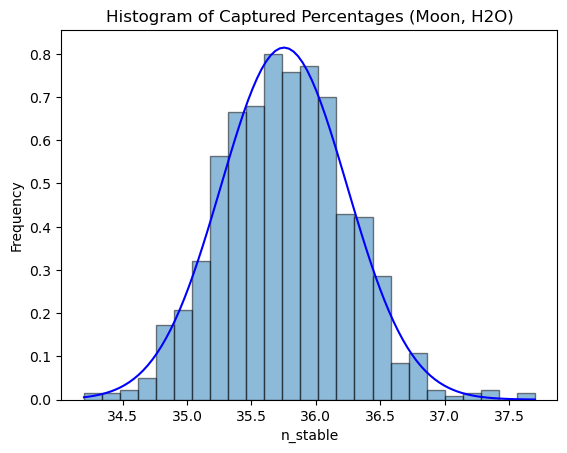

In [25]:
# Setting up histogram
plt.hist(captured_percentages_moon, bins=25, edgecolor='black', density=True, alpha=0.5)
plt.xlabel('n_stable')
plt.ylabel('Frequency')
plt.title('Histogram of Captured Percentages (Moon, H2O)')

# Create a normal distribution curve
mu, sigma = np.mean(captured_percentages_moon), np.std(captured_percentages_moon)
x = np.linspace(min(captured_percentages_moon), max(captured_percentages_moon), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, 'b', label='Normal Distribution Curve')

plt.show()

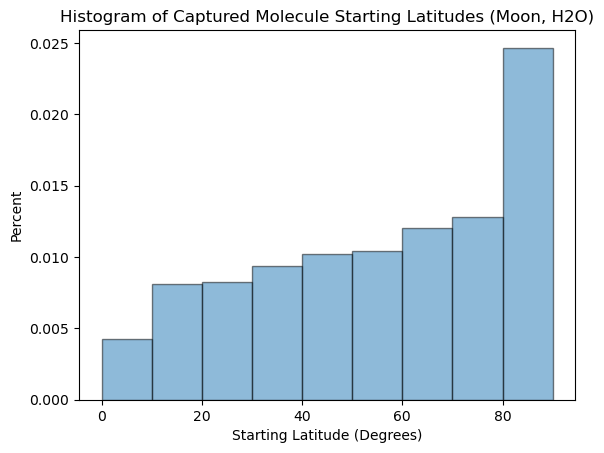

In [26]:
# Setting up histogram
plt.hist(captured_start_latitudes_moon, bins=9, edgecolor='black', density=True, alpha=0.5)
plt.xlabel('Starting Latitude (Degrees)')
plt.ylabel('Percent')
plt.title('Histogram of Captured Molecule Starting Latitudes (Moon, H2O)')

plt.show()

I've broken up my figures into the Moon and Mars respectively so the two figures above pertain to the moon graphs in Figures 4 and 5. Figure 4 in the paper shows a normal distribution over their n_stable percentage. Their histogram does span over 1% which is a bit less than mine which spans over 3%. Another difference between the two is that my y-axis is frequency whereas theirs is number of trials. I chose to go with frequency because it was a bit more straightforward to implement and it still illustrates the same point of having the normal distribution. For the second graph looking at starting latitudes, I had the opposite result as the paper did and I suspect it's because my capture area probabilities looked different from the paper and their loss probability was variable whereas mine was constant due to the fact that hop time was constant. These results are consistent with what I would expect since the higher latitudes have a greater probability of passing the capture check.

In [22]:
# Number of times to run the simulation
num_simulations = 100

# Setting up empty stats to collect
total_captured_percentage_mars = 0 # Store the total captured percentage to calculate the average
captured_percentages_mars = []  # Store the captured percentages to see distribution

# Constants for Mars and H2O. This isn't strictly necessary because this is what the model
# defaults are set to but I wanted to demonstrate how someone would go about setting them.
MASS = 2.988e-26
GRAVITY_MARS = 3.705
RADIUS_MARS = 2439e3

# Running simulation 1000 times
for _ in range(num_simulations):
    # Create a new instance of the model with 10000 initial molecules
    model = Model(10000, RADIUS_MARS, MASS, GRAVITY_MARS)
    # Run simulation until all molecules are trapped or captured
    model.run_simulation()    
    # Calculate percent captured
    captured_percent = (model.trapped / model.num_molecules) * 100    
    # Add percentage to array for later calculations
    captured_percentages_mars.append(captured_percent)
    total_captured_percentage_mars += captured_percent
    # Return the latitudes of captured molecules
    captured_start_latitudes_mars = model.captured_start_latitudes  # Get captured starting latitudes

# Calculate average captured percentage after all simulations are run
average_captured_percentage = total_captured_percentage_mars / num_simulations
print(f"Average Percent captured: {average_captured_percentage}%")

Captured: 3780, Lost: 6220, Total iterations: 220
Percent captured: 37.8%
Captured: 3891, Lost: 6109, Total iterations: 223
Percent captured: 38.91%
Captured: 3924, Lost: 6076, Total iterations: 223
Percent captured: 39.24%
Captured: 3920, Lost: 6080, Total iterations: 305
Percent captured: 39.2%
Captured: 3908, Lost: 6092, Total iterations: 221
Percent captured: 39.08%
Captured: 3880, Lost: 6120, Total iterations: 225
Percent captured: 38.800000000000004%
Captured: 3938, Lost: 6062, Total iterations: 217
Percent captured: 39.379999999999995%
Captured: 3924, Lost: 6076, Total iterations: 237
Percent captured: 39.24%
Captured: 3891, Lost: 6109, Total iterations: 247
Percent captured: 38.91%
Captured: 3970, Lost: 6030, Total iterations: 236
Percent captured: 39.7%
Captured: 4026, Lost: 5974, Total iterations: 238
Percent captured: 40.26%
Captured: 3943, Lost: 6057, Total iterations: 259
Percent captured: 39.43%
Captured: 3931, Lost: 6069, Total iterations: 217
Percent captured: 39.31%
Ca

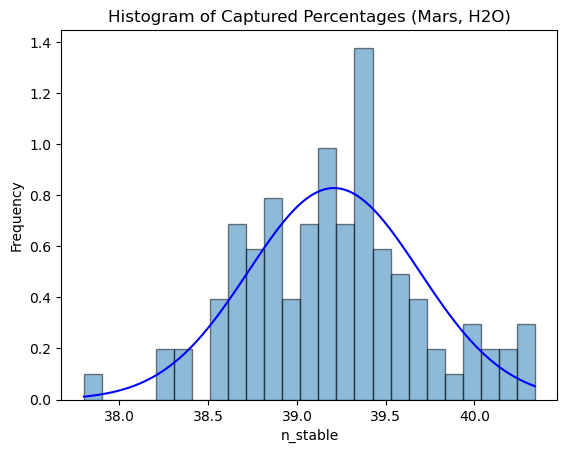

In [23]:
plt.hist(captured_percentages_mars, bins=25, edgecolor='black', density=True, alpha=0.5)
plt.xlabel('n_stable')
plt.ylabel('Frequency')
plt.title('Histogram of Captured Percentages (Mars, H2O)')

# Create a normal distribution curve
mu, sigma = np.mean(captured_percentages_mars), np.std(captured_percentages_mars)
x = np.linspace(min(captured_percentages_mars), max(captured_percentages_mars), 100)
y = stats.norm.pdf(x, mu, sigma)
plt.plot(x, y, 'b', label='Normal Distribution Curve')

plt.show()

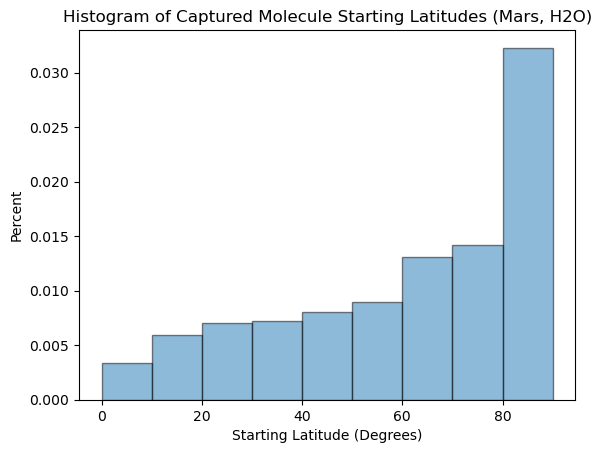

In [24]:
plt.hist(captured_start_latitudes_mars, bins=9, edgecolor='black', density=True, alpha=0.5)
plt.xlabel('Starting Latitude (Degrees)')
plt.ylabel('Percent')
plt.title('Histogram of Captured Molecule Starting Latitudes (Mars, H2O)')

plt.show()

I had very similar results for the Mars graphs as well. The first graph shows the normal distribution however the n_stable values are much higher than I would expect for Mars. I think the primary reason for this is because the capture areas I'm using were calculated for the Moon, however in my research I was unable to find a paper that had the capture areas for Mars based on latitude. Conversely the second graph is quite similar to what the paper's results were. They also found that the higher latitudes made up the starting latitudes of more of the captured molecules.

Overall, I do think I was successful with my benchmark goals in this project. I was able to create very similar graphs to the paper (barring exact values) and for most of them was able to replicate the same trends. Where I wasn't able to see the trend, I did have ideas of where the difference could be coming from. Given that my model is not a complete replica of the Butler 97 model, this was expected going into this project.